In [2]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
#import ml_metrics

import seaborn as sn
import matplotlib.pyplot as plt
import pickle

In [3]:
df_results = pd.read_csv('result_Rinfo.csv')
df_results = df_results[['Respondent ID','Rugged Delicate', 'Exitable Calm', 'Uncomfortable Comfortable', 'Dominating Submissive', 'Thrifty Indulgent', 'Pleasant Unpleasant', 'Contemporary Uncontemporary', 'Organized Unorganized', 'Rational Emotional', 'Youthful Mature', 'Formal Informal', 'Orthodox Liberal', 'Complex Simple', 'Colorful Colorless', 'Modest Vain']] = df_results[['Respondent ID','Rugged Delicate', 'Exitable Calm', 'Uncomfortable Comfortable', 'Dominating Submissive', 'Thrifty Indulgent', 'Pleasant Unpleasant', 'Contemporary Uncontemporary', 'Organized Unorganized', 'Rational Emotional', 'Youthful Mature', 'Formal Informal', 'Orthodox Liberal', 'Complex Simple', 'Colorful Colorless', 'Modest Vain']]
df = df_results.set_index('Respondent ID')

df.index.name = None

df.head(5)

,Rugged Delicate,Exitable Calm,Uncomfortable Comfortable,Dominating Submissive,Thrifty Indulgent,Pleasant Unpleasant,Contemporary Uncontemporary,Organized Unorganized,Rational Emotional,Youthful Mature,Formal Informal,Orthodox Liberal,Complex Simple,Colorful Colorless,Modest Vain
13264663777,4.0,2.0,3.0,5.0,5.0,1.0,5.0,2.0,4.0,5.0,3.0,2.0,4.0,4.0,2.0
13263750995,1.0,2.0,5.0,3.0,6.0,1.0,0.0,6.0,2.0,2.0,6.0,6.0,3.0,1.0,5.0
13263613156,5.0,5.0,6.0,7.0,1.0,1.0,7.0,0.0,6.0,3.0,5.0,0.0,6.0,1.0,0.0
13249068738,5.0,4.0,2.0,4.0,6.0,2.0,2.0,3.0,6.0,5.0,4.0,5.0,4.0,5.0,3.0
13244840492,2.0,2.0,7.0,2.0,4.0,1.0,2.0,2.0,3.0,3.0,5.0,4.0,2.0,6.0,3.0


In [4]:
respondenten = df.index

In [5]:
#normalizing the data
from sklearn.preprocessing import MaxAbsScaler

def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in df.columns:
    df[col] = absolute_maximum_scale(df[col])

scaler = MaxAbsScaler()
scaler.fit(df)

scaled = scaler.transform(df)
df = pd.DataFrame(scaled, columns=df.columns, index = respondenten)
df.head(5)

,Rugged Delicate,Exitable Calm,Uncomfortable Comfortable,Dominating Submissive,Thrifty Indulgent,Pleasant Unpleasant,Contemporary Uncontemporary,Organized Unorganized,Rational Emotional,Youthful Mature,Formal Informal,Orthodox Liberal,Complex Simple,Colorful Colorless,Modest Vain
13264663777,0.666667,0.333333,0.428571,0.714286,0.714286,0.142857,0.714286,0.285714,0.571429,0.714286,0.428571,0.285714,0.571429,0.571429,0.333333
13263750995,0.166667,0.333333,0.714286,0.428571,0.857143,0.142857,0.000000,0.857143,0.285714,0.285714,0.857143,0.857143,0.428571,0.142857,0.833333
13263613156,0.833333,0.833333,0.857143,1.000000,0.142857,0.142857,1.000000,0.000000,0.857143,0.428571,0.714286,0.000000,0.857143,0.142857,0.000000
13249068738,0.833333,0.666667,0.285714,0.571429,0.857143,0.285714,0.285714,0.428571,0.857143,0.714286,0.571429,0.714286,0.571429,0.714286,0.500000
13244840492,0.333333,0.333333,1.000000,0.285714,0.571429,0.142857,0.285714,0.285714,0.428571,0.428571,0.714286,0.571429,0.285714,0.857143,0.500000


In [6]:
df_train = df.dropna()

In [7]:
correlation_matrix = df_train.corr()

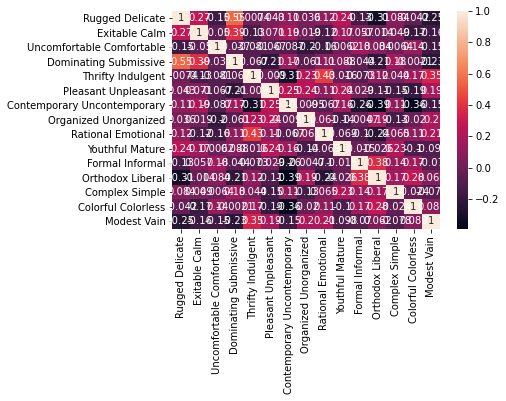

In [8]:
sn.heatmap(correlation_matrix, annot=True)
plt.show()

In [9]:
#split data in train and test set
train, test = train_test_split(df_train, test_size=0.3,random_state=42)

In [10]:
train.head()

,Rugged Delicate,Exitable Calm,Uncomfortable Comfortable,Dominating Submissive,Thrifty Indulgent,Pleasant Unpleasant,Contemporary Uncontemporary,Organized Unorganized,Rational Emotional,Youthful Mature,Formal Informal,Orthodox Liberal,Complex Simple,Colorful Colorless,Modest Vain
13239676771,0.666667,0.666667,0.714286,0.428571,0.285714,0.142857,0.428571,0.000000,0.285714,0.714286,0.857143,0.714286,0.714286,0.428571,0.166667
13238462788,0.833333,0.666667,0.714286,0.571429,0.714286,0.428571,0.142857,0.285714,0.285714,0.714286,0.714286,1.000000,0.571429,0.714286,0.333333
13238184908,0.333333,0.333333,0.428571,0.142857,0.571429,1.000000,0.428571,1.000000,0.571429,0.714286,0.714286,0.714286,0.285714,0.571429,0.833333
13240463751,0.833333,0.833333,1.000000,0.571429,0.571429,0.285714,0.571429,0.428571,0.571429,0.571429,0.428571,0.857143,0.285714,0.571429,0.500000
13249117061,0.833333,1.000000,0.428571,0.714286,0.714286,0.428571,0.714286,0.714286,0.714286,0.714286,0.428571,0.428571,0.714286,0.428571,0.833333


In [11]:
#define knn model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=3, n_jobs=-1)
model_knn.fit(train)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

### Evaluation

In [12]:
test.head()

,Rugged Delicate,Exitable Calm,Uncomfortable Comfortable,Dominating Submissive,Thrifty Indulgent,Pleasant Unpleasant,Contemporary Uncontemporary,Organized Unorganized,Rational Emotional,Youthful Mature,Formal Informal,Orthodox Liberal,Complex Simple,Colorful Colorless,Modest Vain
13244840492,0.333333,0.333333,1.000000,0.285714,0.571429,0.142857,0.285714,0.285714,0.428571,0.428571,0.714286,0.571429,0.285714,0.857143,0.500000
13237381960,0.833333,1.000000,1.000000,0.857143,0.142857,0.000000,0.000000,0.857143,0.000000,0.571429,0.857143,1.000000,0.571429,0.714286,0.333333
13239806794,0.833333,0.500000,0.428571,0.714286,0.714286,0.000000,0.142857,0.428571,0.714286,0.285714,0.285714,0.285714,0.142857,0.571429,0.666667
13264663777,0.666667,0.333333,0.428571,0.714286,0.714286,0.142857,0.714286,0.285714,0.571429,0.714286,0.428571,0.285714,0.571429,0.571429,0.333333
13240917054,0.500000,0.333333,0.714286,0.428571,0.428571,0.285714,0.142857,0.142857,0.714286,0.857143,0.428571,0.428571,0.428571,0.285714,0.833333


In [13]:
#####voorbeeld hoe het werkt bij 1 persoon 
person1 = test.iloc[1,:].values.reshape(1,-1)

In [14]:
n_neighors = 3
n_recommendations = 5
#get predicted values
style_neighbors = model_knn.kneighbors(person1, n_neighors, return_distance=True)

In [15]:
#the 3 distances
#followed up with 3 (same/similar) users
style_neighbors

(array([[0.09128729, 0.09588328, 0.09733059]]), array([[ 1,  8, 51]]))

In [16]:
#the 3 neighbors
style_neighbors[1]

array([[ 1,  8, 51]])

In [17]:
[respondenten[nb] for nb in style_neighbors[1][0]]

[13263750995, 13240463751, 13240917054]

In [18]:
like_matrix = pd.read_csv('style_like_scores_matrix.csv', index_col = 'Unnamed: 0')

In [19]:
like_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
13264663777,-0.666667,0.0,-0.142857,0.142857,0.035714,0.043478,-0.142857,-0.2,0.024390,0.0,...,0.0,0.035714,0.0,0.25,0.0,-1.0,-0.2,-0.181818,0.428571,0.111111
13263750995,-0.666667,0.0,-0.142857,-0.428571,-0.035714,-0.043478,-0.142857,-0.1,-0.024390,0.0,...,0.0,0.107143,0.0,0.00,0.0,-1.0,-0.2,0.000000,0.142857,0.111111
13263613156,0.000000,0.0,0.142857,-0.714286,0.107143,-0.130435,-0.142857,0.1,0.121951,0.0,...,0.0,0.250000,0.0,0.25,0.0,1.0,-0.2,0.000000,-0.428571,-0.333333
13249068738,-0.666667,0.0,-0.142857,-0.714286,-0.214286,-0.304348,-0.142857,-0.2,-0.268293,0.0,...,0.0,-0.321429,0.0,-0.25,0.0,-1.0,-0.2,-0.181818,-0.428571,-0.333333
13244840492,0.666667,0.0,0.142857,0.142857,0.000000,0.130435,-0.142857,0.0,0.073171,0.0,...,0.0,0.178571,0.0,-0.25,0.0,1.0,0.2,0.000000,0.142857,0.333333


In [20]:
#de score van the neighbors voor 25 style types
resp = [respondenten[nb] for nb in style_neighbors[1][0]]
like_matrix[like_matrix.index.isin(resp)]


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
13263750995,-0.666667,0.0,-0.142857,-0.428571,-0.035714,-0.043478,-0.142857,-0.1,-0.024390,0.0,...,0.0,0.107143,0.0,0.000,0.0,-1.0,-0.2,0.000000,0.142857,0.111111
13240463751,0.000000,0.0,0.142857,0.714286,0.035714,0.217391,0.142857,0.1,0.073171,0.0,...,0.0,0.178571,0.0,-0.250,0.0,1.0,-0.2,0.000000,0.142857,0.111111
13240917054,0.000000,0.0,-0.142857,0.142857,-0.053571,0.130435,0.142857,-0.1,-0.048780,0.0,...,0.0,-0.071429,1.0,0.125,0.0,0.0,0.2,0.090909,0.000000,0.111111


In [21]:
#de mean score van de 3 soort gelijke users voor de 25 genres
avg_score_genres = like_matrix[like_matrix.index.isin(resp)].mean()
avg_score_genres

0    -2.222222e-01
1     0.000000e+00
2    -4.761905e-02
3     1.428571e-01
4    -1.785714e-02
5     1.014493e-01
6     4.761905e-02
7    -3.333333e-02
8    -2.312965e-18
9     0.000000e+00
10   -3.333333e-01
11    0.000000e+00
12    8.823529e-02
13   -3.703704e-02
14    0.000000e+00
15    0.000000e+00
16    7.142857e-02
17    3.333333e-01
18   -4.166667e-02
19    0.000000e+00
20    0.000000e+00
21   -6.666667e-02
22    3.030303e-02
23    9.523810e-02
24    1.111111e-01
dtype: float64

In [22]:
def sort_index(lst, rev=True):
    index = range(len(lst))
    s = sorted(index, reverse=rev, key=lambda i: lst[i])
    return s

In [23]:
index_recommendations = sort_index(avg_score_genres)[:n_recommendations]
index_recommendations

[17, 3, 24, 5, 23]

In [24]:
style_id = pickle.load(open('style_indexes.p','rb'))

In [25]:
style_recommendations = [style_id[rec] for rec in index_recommendations]
style_recommendations

['Luxury', 'Business', 'Sexy', 'Chic', 'Romantic']

####  Recommendations voor de hele test set 

In [26]:
neighbors = model_knn.kneighbors(test, n_neighors, return_distance=True)

In [27]:
#voor alle 25 personen in de test set, de 3 neighbors
neighbors = neighbors[1]
neighbors

array([[27, 41, 34],
       [ 1,  8, 51],
       [11, 15, 18],
       [15,  4, 23],
       [16, 31, 13],
       [45, 35, 42],
       [32,  7,  8],
       [41, 45, 42],
       [12, 40, 42],
       [24, 27, 37],
       [52, 41, 37],
       [ 3, 41, 13],
       [48, 27, 12],
       [45, 17, 37],
       [ 1, 45, 42],
       [51, 52,  1],
       [15, 16,  5],
       [37, 34,  7],
       [52, 41,  1],
       [20, 27, 19],
       [13, 41,  3],
       [ 8,  3,  1],
       [37,  0, 45],
       [45, 23, 17]])

In [28]:
neighbors = [[respondenten[nb] for nb in list_of_nb] for list_of_nb in neighbors]
neighbors

[[13264685797, 13237381960, 13238590958],
 [13263750995, 13240463751, 13240917054],
 [13239966016, 13239741363, 13238520630],
 [13239741363, 13244840492, 13237855975],
 [13239746222, 13245211614, 13239806794],
 [13237319909, 13238520834, 13237386087],
 [13243254947, 13240718620, 13240463751],
 [13237381960, 13237319909, 13237386087],
 [13239867945, 13237449180, 13237386087],
 [13237402846, 13264685797, 13238184908],
 [13239673038, 13237381960, 13238184908],
 [13249068738, 13237381960, 13239806794],
 [13249047153, 13264685797, 13239867945],
 [13237319909, 13239743538, 13238184908],
 [13263750995, 13237319909, 13237386087],
 [13240917054, 13239673038, 13263750995],
 [13239741363, 13239746222, 13244520859],
 [13238184908, 13238590958, 13240718620],
 [13239673038, 13237381960, 13263750995],
 [13238452713, 13264685797, 13238479027],
 [13239806794, 13237381960, 13249068738],
 [13240463751, 13249068738, 13263750995],
 [13238184908, 13264663777, 13237319909],
 [13237319909, 13237855975, 132397

In [29]:
#voeg alle stappen zoals samen zoals bij 1 persoon: maar nu voor iedere persoon
# alle recommendations voor de test set
recommendations_test = [sort_index(like_matrix[like_matrix.index.isin(nb)].mean())[:n_recommendations] for nb in neighbors]
recommendations_test

[[21, 12, 5, 13, 24],
 [17, 3, 24, 5, 23],
 [21, 24, 23, 12, 1],
 [21, 24, 0, 1, 9],
 [10, 15, 17, 20, 7],
 [19, 13, 3, 1, 21],
 [20, 19, 3, 9, 1],
 [21, 3, 13, 12, 5],
 [1, 13, 21, 9, 10],
 [21, 12, 24, 0, 10],
 [21, 3, 0, 15, 20],
 [21, 12, 1, 10, 15],
 [1, 12, 15, 5, 13],
 [21, 6, 9, 10, 15],
 [13, 21, 12, 5, 1],
 [23, 12, 9, 11, 15],
 [0, 1, 9, 10, 11],
 [20, 13, 21, 22, 12],
 [23, 12, 15, 21, 24],
 [0, 21, 8, 12, 18],
 [21, 12, 1, 10, 15],
 [1, 9, 10, 11, 15],
 [3, 18, 21, 8, 24],
 [19, 9, 1, 10, 15]]

In [30]:
i = 0
for recommendation in recommendations_test:
    print("User: " + str(test.index[i]) + " heeft aanbevelingen:")
    print([style_id[rec] for rec in recommendation])
    i += 1


User: 13244840492 heeft aanbevelingen:
['Party', 'Feminine', 'Chic', 'Form-fitting', 'Sexy']
User: 13237381960 heeft aanbevelingen:
['Luxury', 'Business', 'Sexy', 'Chic', 'Romantic']
User: 13239806794 heeft aanbevelingen:
['Party', 'Sexy', 'Romantic', 'Feminine', 'Bohemian']
User: 13264663777 heeft aanbevelingen:
['Party', 'Sexy', 'Active', 'Bohemian', 'Contemporary']
User: 13240917054 heeft aanbevelingen:
['Designer', 'Goth', 'Luxury', 'Monochrome', 'Colorful']
User: 13239152356 heeft aanbevelingen:
['Modest', 'Form-fitting', 'Business', 'Bohemian', 'Party']
User: 13237754403 heeft aanbevelingen:
['Monochrome', 'Modest', 'Business', 'Contemporary', 'Bohemian']
User: 13238620869 heeft aanbevelingen:
['Party', 'Business', 'Form-fitting', 'Feminine', 'Chic']
User: 13238642415 heeft aanbevelingen:
['Bohemian', 'Form-fitting', 'Party', 'Contemporary', 'Designer']
User: 13238590958 heeft aanbevelingen:
['Party', 'Feminine', 'Sexy', 'Active', 'Designer']
User: 13237797264 heeft aanbevelingen

In [31]:
styles_test = like_matrix[like_matrix.index.isin(test.index)]

In [32]:
#get 3 actual most popular style labels
y_test = styles_test.apply(lambda x: pd.Series(x.nlargest(5).index), axis=1)
y_test = y_test.values.tolist()

In [33]:
#flatten (nested) list for evaluation
y_pred = [val for sublist in recommendations_test for val in sublist]
y_test = [val for sublist in y_test for val in sublist]

In [34]:
y_test = [int(y) for y in y_test]

In [35]:
metrics.f1_score(y_test,y_pred,average = 'macro')

0.03261558441558441